In [1]:
import dhlab as dh
import tools_imag as ti
from tools_imag import imag_corpus
import dhlab.api.dhlab_api as api
import pandas as pd
from importlib import reload

In [2]:
def get_imag_corpus():
    im = imag_corpus()
    c = dh.Corpus()
    c.extend_from_identifiers(im.urn)
    corpus = c.frame
    corpus.dhlabid = corpus.dhlabid.astype(int)
    corpus = corpus[['urn', 'dhlabid', 'title', 'authors', 
       'city',  'year', 'publisher', 'langs', 'subjects', 'ddc',
       'genres', 'literaryform', 'doctype', 'ocr_creator']]
    corpus = corpus.merge(im[['urn', 'category']], left_on='urn', right_on='urn')
    return corpus

In [3]:
_15.columns

NameError: name '_15' is not defined

In [ ]:
get_imag_corpus()

In [4]:
c = ti.get_imag_corpus()

In [5]:
#pi.get_document_frequencies??

In [6]:
cnts = api.get_document_frequencies(list(c.urn), words = ["og", "i", '.', ','])

In [7]:
cnts

freq                                                              \
urn  100000474 100000547 100000642 100000647 100000648 100000649 100000652   
word                                                                         
,       8347.0    8909.0    6946.0    5854.0    7702.0    6600.0    2862.0   
.       5808.0    5654.0    5317.0    3419.0    5493.0    4583.0    1777.0   
i       2565.0    2657.0    1682.0    1506.0    2503.0    2884.0     673.0   
og      3999.0    3318.0    2242.0    2288.0    4640.0    3348.0    1445.0   

                                    ...   relfreq                      \
urn  100000658 100000660 100000663  ... 100664406 100664412 100664414   
word                                ...                                 
,       1754.0    1684.0    2589.0  ...  0.084105  0.081303  0.060131   
.        784.0    1004.0    2379.0  ...  0.035377  0.037558  0.042470   
i        445.0     477.0     834.0  ...  0.022428  0.022035  0.023859   
og       492.0     611.0    1787.0  ...  0.037558  0.033976  0.039139   

                                                                            
urn  100664415 100664418 100664420 100664421 100664422 100664425 100664430  
word                                                                        
,     0.063501  0.043493  0.099141  0.077967  0.079851  0.068601  0.066187  
.     0.036706  0.043493  0.078473  0.051505  0.036474  0.053575  0.057806  
i     0.019895  0.025254  0.020380  0.022533  0.016974  0.017270  0.022236  
og    0.039573  0.040439  0.029780  0.023452  0.035764  0.027890  0.027539  

[4 rows x 45104 columns]

In [8]:
def imagination_ngram(corpus, words, mode='rel'):
    cnts = api.get_document_frequencies(list(corpus.urn), words = words)
    d2y = pd.Series(corpus.set_index('dhlabid')['year'].to_dict())
    d2y.to_frame('year')
    if mode.startswith('r') or mode.startswith('R'):
        df = cnts['relfreq']
    else:
        df = cnts['freq']
    frek = df.transpose().copy()
    frek = pd.concat([frek, d2y.to_frame('year')], axis = 1)
    return frek.groupby('year').mean()

In [9]:
import dhlab.api.dhlab_api as api
import pandas as pd

def corpus_ngram(corpus, words, mode='rel'):
    cnts = api.get_document_frequencies(list(corpus.urn), words = words)
    d2y = pd.Series(corpus.set_index('dhlabid')['year'].to_dict())
    d2y.to_frame('year')
    if mode.startswith('r') or mode.startswith('R'):
        df = cnts['relfreq']
    else:
        df = cnts['freq']
    frek = df.transpose().copy()
    frek = pd.concat([frek, d2y.to_frame('year')], axis = 1)
    return frek.groupby('year').mean()

<Axes: xlabel='year'>

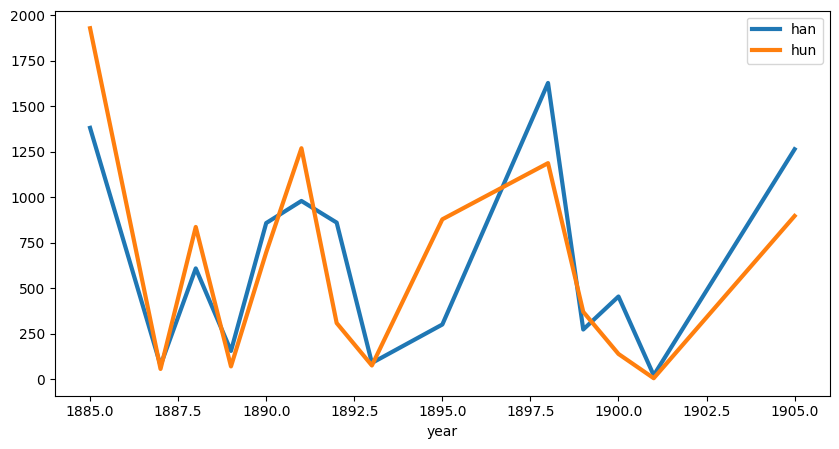

In [10]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["han", "hun"], mode="a").plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

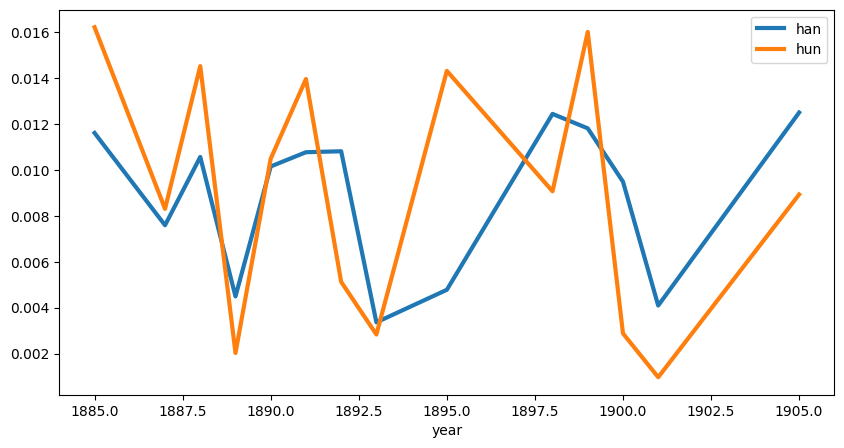

In [11]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["han", "hun"], mode="r").plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

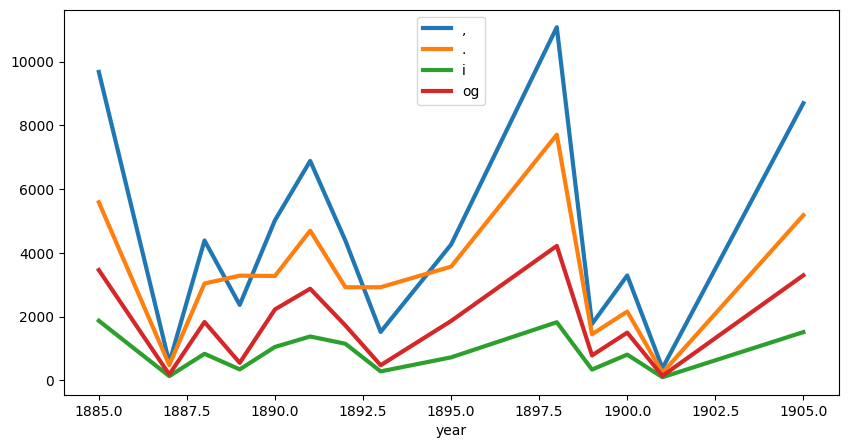

In [12]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["og", "i", '.', ','], mode='abs').plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

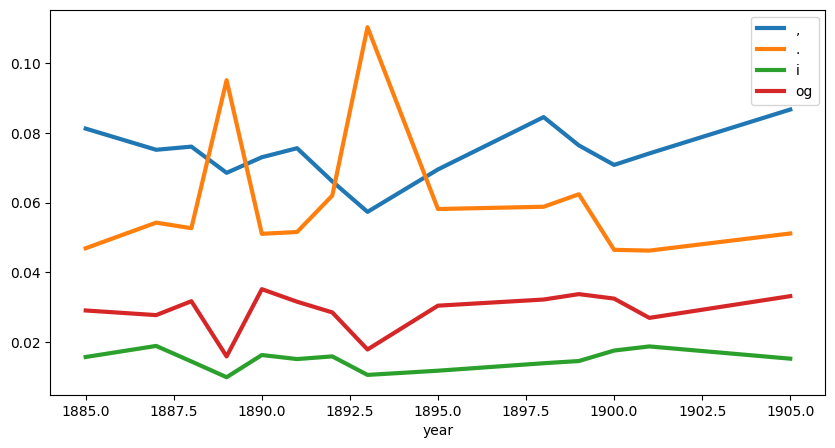

In [13]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["og", "i", '.', ','], mode='r').plot(figsize=(10,5), lw=3)

In [23]:
list(c.dhlabid.sample(10).values)

[100506844,
 100631349,
 100633721,
 100631548,
 100635341,
 100623388,
 100625352,
 100636286,
 100623687,
 100614685]

In [24]:
api.get_urn_frequencies(urns = list(c.urn.sample(10).values))

,urn,freq
0,100628037,19913
1,100634942,15875
2,100635132,24089
3,100617766,14550
4,100619012,21870
5,100620290,14143
6,100620888,72536
7,100624201,4471
8,100626262,13793
9,100626377,7576


In [26]:
c.sample(3)

,urn,dhlabid,title,authors,city,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,category
19050,URN:NBN:no-nb_digibok_2015012808047,100632565,Norges gamle Love indtil 1387 . Andet Bind : L...,"Munch , P. A. ( Peter Andreas ) / Keyser , Rud...",,1848.0,Trykt hos Chr. Grøndahl,mul / non / nor,Lovgivning / Middelalderen / Middelalderen / L...,,legislation,Faglitteratur,digibok,dhlab,Historie / geografi
5808,URN:NBN:no-nb_digibok_2009060912003,100618290,Fra vor By,"Zwilgmeyer , Dikken",Bergen,1892.0,Nygaard,nob,,,fiction,Skjønnlitteratur,digibok,dhlab,Barnelitteratur
22243,URN:NBN:no-nb_digibok_2020042948005,100636250,Motive zu dem im Jahre 1832 herausgegebenen Vo...,"Thaulow , Johan Fredrik / Vogt , Jørgen Herman...",,1835.0,Gedruckt bey Chr. Grøndahl,ger / dan,Lovgivning / Straffelov / 1800-tallet,,legislation,Faglitteratur,digibok,dhlab,Samfunn / politikk / juss


In [31]:
conc = dh.Concordance(c, "demokrati")

conc.show(n=100, style=False)

,link,urn,concordance
139,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2009042803022,"» Vi ville haabe , at det moderne <b>Demokrati..."
266,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2014021807219,"... til Østersøprovindserne , maa man formeent..."
353,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2010052606074,... I journalistiske Lejlighedsdigte hudflette...
448,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2009100912001,"... talte om <b>Demokrati</b> , paa Ordet og f..."
20,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2018042448534,"... Det var ikke mere Carvayan , der vilde oms..."
122,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2013080808076,"... af Laveleye sterkt fremhævet , kan savnes ..."
5,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2007080910010,... han før har gjort ) afviger fra det samme ...
309,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2006082800101,* * ) « l navnet var det vistnok et <b>demokra...
306,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2009060912001,"... , , Undertiden gaar en statsordning over t..."
239,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2014081508327,"... at antage , at nutiden maa siges afgjort a..."


In [32]:
conc.frame

,link,urn,concordance
0,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2006111400032,"den ikke kunde ydes , eller han vende tilbage ..."
1,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2006082300021,... Regjeringsformen i Israel er efter Anlægge...
2,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2013080808076,... afgjort at tendere mod et mere og mere udv...
3,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2015012808041,Vort til et almindeligt Valgsystem støttede <b...
4,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2018011768017,... De er Bærerne af vort kirkelige <b>Demokra...
...,...,...,...
495,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2008040300033,"... Det attiske <b>Demokrati</b> , som mente ,..."
496,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2013061808075,"... de hjælpeløse ; først da , i det rette <b>..."
497,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2014121208041,"... Vi nmencr ikke hermed det sunde , selvbehe..."
498,<a target='_blank' href = 'https://urn.nb.no/U...,URN:NBN:no-nb_digibok_2006112101019,"... hensynsløsere i at bruge Magten , end et b..."
